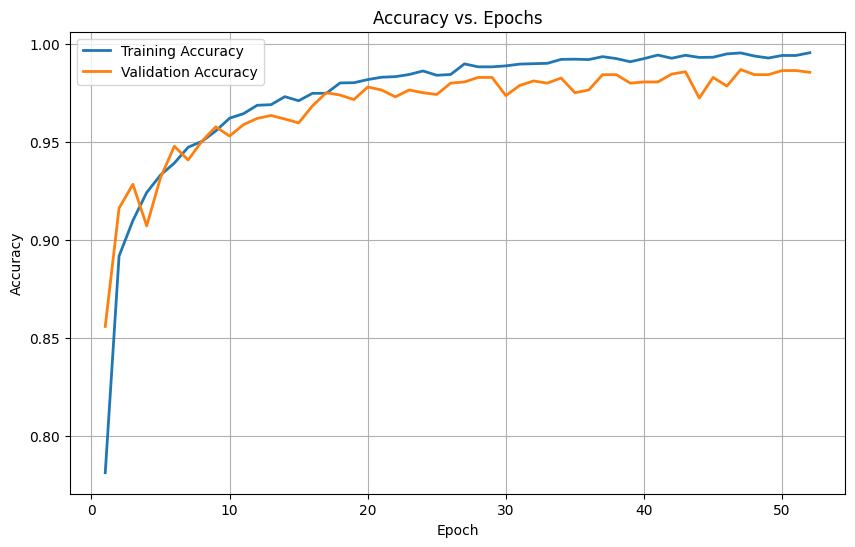

In [8]:
import re
import matplotlib.pyplot as plt

# Load the log file
log_file_path = "logs28099616.txt"

with open(log_file_path, 'r') as file:
    logs = file.readlines()

# Extract accuracy data from the log file
train_accuracy = []
val_accuracy = []
epochs = []

# Updated regex pattern to precisely match the log structure
pattern = r"^431/431.*loss: \d+\.\d+ - accuracy: (\d+\.\d+) - val_loss: \d+\.\d+ - val_accuracy: (\d+\.\d+)"

epoch_counter = 0

for line in logs:
    match = re.search(pattern, line)
    if match:
        epoch_counter += 1
        train_acc = float(match.group(1))
        val_acc = float(match.group(2))
        epochs.append(epoch_counter)
        train_accuracy.append(train_acc)
        val_accuracy.append(val_acc)

# Check if data was extracted
if not train_accuracy or not val_accuracy:
    print("No accuracy data found. Please check the log file format.")
else:
    # Plot accuracy vs. epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_accuracy, label="Training Accuracy", linewidth=2)
    plt.plot(epochs, val_accuracy, label="Validation Accuracy", linewidth=2)
    plt.title("Accuracy vs. Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
